DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   

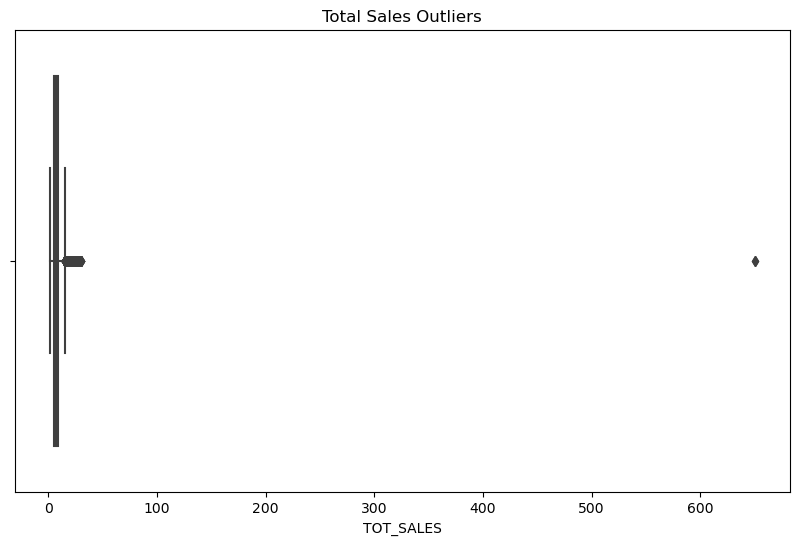

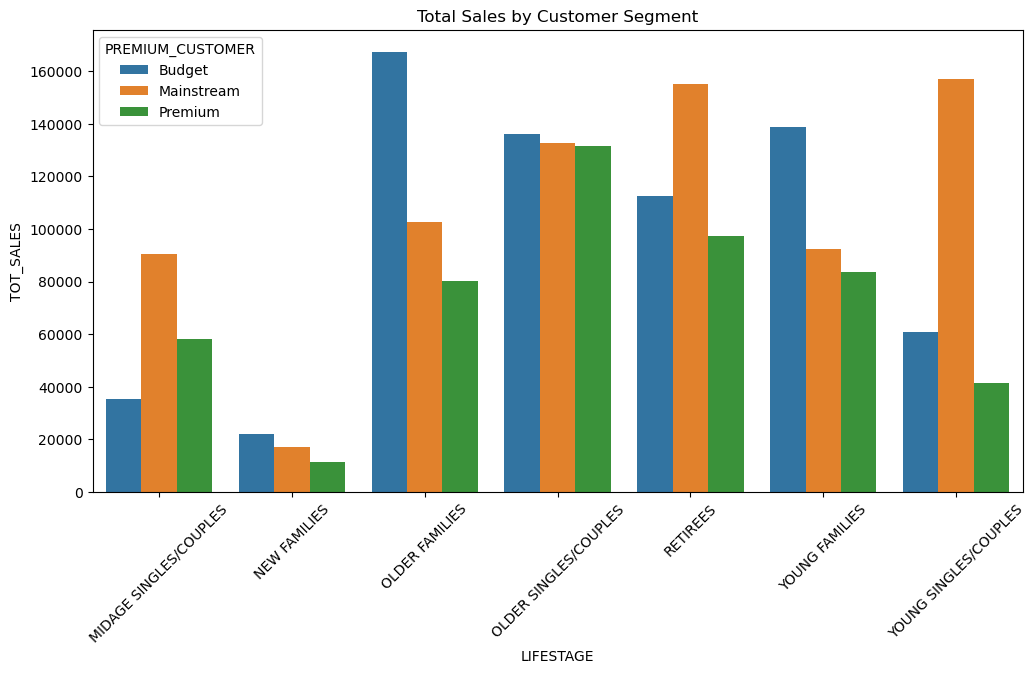

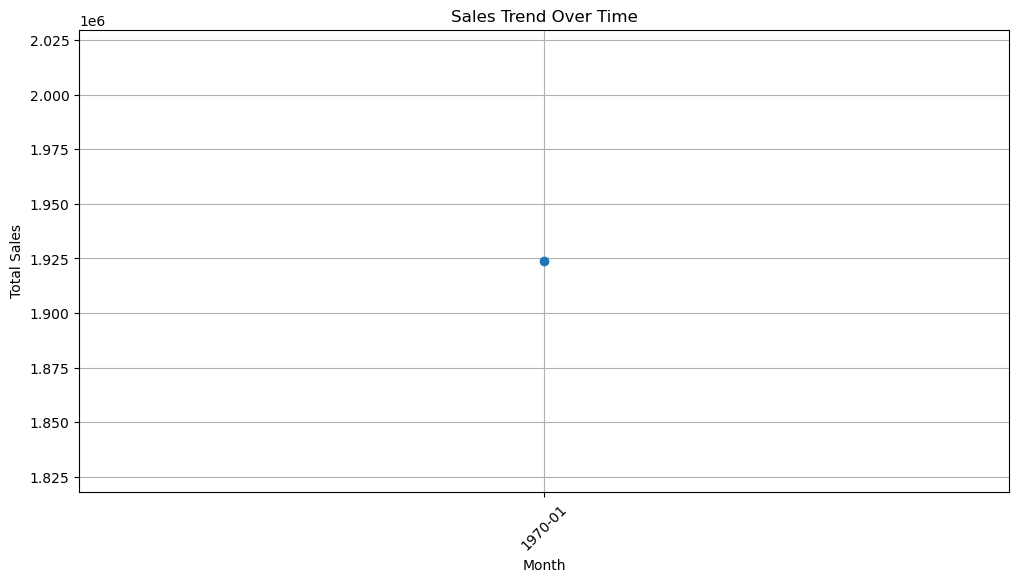

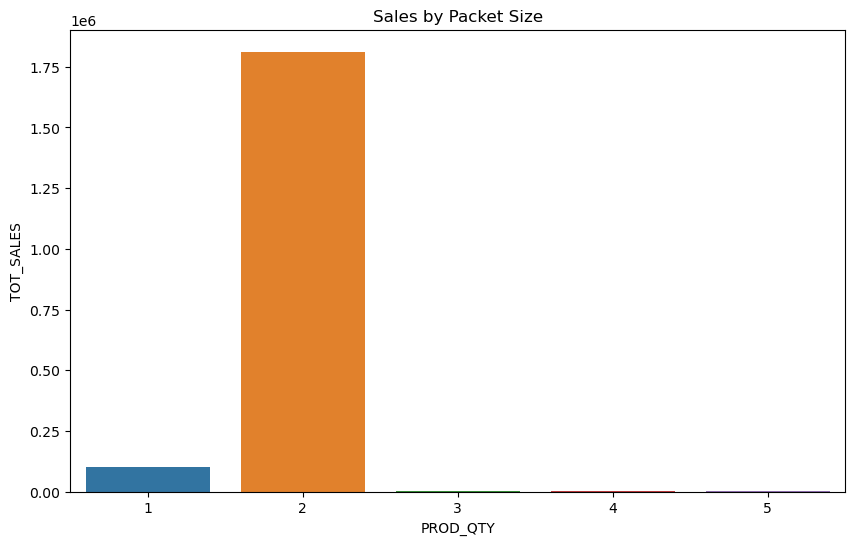

In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading transaction data
transaction_data = pd.read_csv("QVI_transaction_data.csv")

# Loading customer data
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

# Step 2: Explore the datasets
# Check for missing values
print(transaction_data.isnull().sum())
print(customer_data.isnull().sum())

# Check the first few rows
print(transaction_data.head())
print(customer_data.head())

# Step 3: Check for duplicates
print("Transaction Data duplicates:", transaction_data.duplicated().sum())
print("Customer Data duplicates:", customer_data.duplicated().sum())

# Step 4: Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=transaction_data['TOT_SALES'])
plt.title('Total Sales Outliers')
plt.show()

# Handle outliers by filtering out extreme values using Z-score
z_scores = np.abs(stats.zscore(transaction_data['TOT_SALES']))
transaction_data = transaction_data[(z_scores < 3)]

# Step 5: Merge the transaction data with customer data
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

# Step 6: Segment customers based on demographics
# Example: Segment by LIFESTAGE and PREMIUM_CUSTOMER
customer_segments = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Visualizing customer segments
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=customer_segments)
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45)
plt.show()

# Step 7: Analyzing Sales Drivers
# Example: Sales trend over time
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'])
sales_trend = transaction_data.groupby(transaction_data['DATE'].dt.to_period('M')).agg({'TOT_SALES':'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sales_trend['DATE'].astype(str), sales_trend['TOT_SALES'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 8: Analyze packet size trends
packet_sales = transaction_data.groupby('PROD_QTY')['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='PROD_QTY', y='TOT_SALES', data=packet_sales)
plt.title('Sales by Packet Size')
plt.show()

# Step 9: Insights and Recommendations
# You can write insights based on visualizations and data analysis. For example:
# - "Premium customers in the 'OLDER FAMILIES' lifestage contribute most to sales."
# - "The most popular packet size is 3, indicating consumer preference for smaller portions."


